<a href="https://colab.research.google.com/github/panxiaofan/Advanced-Mahchine-Perception/blob/master/CIS680_Fall2020_HW1_b_Answer_4.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive

This first code block attaches your google drive and makes a folder structure. You only need to run this when a new VM is assigned to you. To get your code as a single python file go through the following menus File->'Download .py'

In [ ]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='../content/gdrive'
drive.mount(DRIVE_MOUNT)


# create folder to write data to
CIS680_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'CIS680_2020')
HOMEWORK_FOLDER=os.path.join(CIS680_FOLDER, 'HW1')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

Mounted at ../content/gdrive


# PyTorch

This code block imports torch and torchvision which provide the libraries for use down below. PyTorch provides many utilities such as standard datasets, for this exercise we will use MNIST. Please see the torchvision documentation for how to instantiate the training and testing data split.

In [ ]:
# torch and torchvision imports
import torch
import torchvision
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# 1) Train a Convolutional Neural Network

In [ ]:
# Create your network here
class HelloWorld(torch.nn.Module):
  def __init__(self):
    super(HelloWorld, self).__init__()
    self.layer1 = nn.Sequential()                                        # 28 *28 *1
    self.layer1.add_module("Conv1", nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))   # 28 *28 *32
    self.layer1.add_module("BN1", nn.BatchNorm2d(num_features=32))
    self.layer1.add_module("Relu1", nn.ReLU())
    self.layer1.add_module("Pool1", nn.AvgPool2d(kernel_size=2, stride=2, padding=0))             # 14 *14 *32 
                                                 
    self.layer2 = nn.Sequential()   
    self.layer2.add_module("Conv2", nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2))  # 14 *14 *32
    self.layer2.add_module("BN2", nn.BatchNorm2d(num_features=32))
    self.layer2.add_module("Relu2", nn.ReLU())
    self.layer2.add_module("Pool2", nn.AvgPool2d(kernel_size=2, stride=2, padding=0))            # 7 *7 *32

    self.layer3 = nn.Sequential()
    self.layer3.add_module("Conv3", nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))  # 7 *7 *64
    self.layer3.add_module("BN3", nn.BatchNorm2d(num_features=64))
    self.layer3.add_module("Relu3", nn.ReLU())
    self.layer3.add_module("Pool3", nn.AvgPool2d(kernel_size=2, stride=2, padding=0))         # 3 *3 *64

    self.fully_connected1 = nn.Sequential()
    self.fully_connected1.add_module("FC1", nn.Linear(in_features=3 * 3 * 64, out_features=64))  
    self.fully_connected1.add_module("BNFC1", nn.BatchNorm1d(64))
    self.fully_connected1.add_module("ReluFC1", nn.ReLU())

    self.fully_connected2 = nn.Sequential()
    self.fully_connected2.add_module("FC2", nn.Linear(in_features=64, out_features=10))
    self.fully_connected2.add_module("SoftMax", nn.Softmax())

  
  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = x.view(-1, 3 * 3 * 64)
    x = self.fully_connected1(x)
    x = self.fully_connected2(x)
    return x
  

In [ ]:
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_test, shuffle=True)
def train(epoch):
    my_first_network.train()
    running_loss = 0
    running_correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = my_first_network(data)
        loss = error(output, target) 
        running_loss += loss.item() * data.size(0)
        loss.backward()
        optimizer.step()
        predicted = torch.max(output.data, 1)[1] 
        running_correct += (predicted == target).sum()
        if batch_idx % display_interval == 0:
          print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(data), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(), float(running_correct*100) / float(batch_size_train*(batch_idx + 1))))
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accu = float(running_correct) / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accu)
    print('\nTrain set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        epoch_loss, running_correct, len(train_loader.dataset),
        100. * running_correct / len(train_loader.dataset)))
    
def test(epoch):
  my_first_network.eval()
  running_loss = 0
  running_correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = my_first_network(data)
      running_loss += error(output, target).item()* data.size(0)
      predicted = torch.max(output.data, 1)[1] 
      running_correct += (predicted == target).sum()
  epoch_loss = running_loss / len(test_loader.dataset)
  epoch_accu = float(running_correct) / len(test_loader.dataset)
  test_losses.append(epoch_loss)
  test_accuracy.append(epoch_accu)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    epoch_loss, running_correct, len(test_loader.dataset),
    100. * running_correct / len(test_loader.dataset)))
  is_new_best(epoch_accu)

def is_new_best(epoch_accu):
  if (epoch_accu > 0.99 and epoch_accu == max(test_accuracy)):
    PATH = HOMEWORK_FOLDER+'/pre-trained model'
    torch.save(my_first_network.state_dict(), PATH)

# Instantiate your network here
torch.manual_seed(42)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
my_first_network = HelloWorld().to(device)
learning_rate = 0.002
optimizer = torch.optim.Adam(my_first_network.parameters(),lr=learning_rate)
error = nn.CrossEntropyLoss()
display_interval = 50
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []
# Train your network here
num_epochs = 5
for epoch in range(num_epochs):
  train(epoch)
  test(epoch)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch : 0 [0/60000 (0%)]	Loss: 2.313303	 Accuracy:0.000%
Epoch : 0 [3200/60000 (5%)]	Loss: 1.529514	 Accuracy:85.846%
Epoch : 0 [6400/60000 (11%)]	Loss: 1.529562	 Accuracy:91.383%
Epoch : 0 [9600/60000 (16%)]	Loss: 1.505485	 Accuracy:93.440%
Epoch : 0 [12800/60000 (21%)]	Loss: 1.474150	 Accuracy:94.628%
Epoch : 0 [16000/60000 (27%)]	Loss: 1.509213	 Accuracy:95.250%
Epoch : 0 [19200/60000 (32%)]	Loss: 1.482019	 Accuracy:95.769%
Epoch : 0 [22400/60000 (37%)]	Loss: 1.491420	 Accuracy:96.087%
Epoch : 0 [25600/60000 (43%)]	Loss: 1.505432	 Accuracy:96.361%
Epoch : 0 [28800/60000 (48%)]	Loss: 1.478469	 Accuracy:96.542%
Epoch : 0 [32000/60000 (53%)]	Loss: 1.476149	 Accuracy:96.741%
Epoch : 0 [35200/60000 (59%)]	Loss: 1.478373	 Accuracy:96.884%
Epoch : 0 [38400/60000 (64%)]	Loss: 1.472646	 Accuracy:97.023%
Epoch : 0 [41600/60000 (69%)]	Loss: 1.472129	 Accuracy:97.132%
Epoch : 0 [44800/60000 (75%)]	Loss: 1.478575	 Accuracy:97.243%
Epoch : 0 [48000/60000 (80%)]	Loss: 1.466384	 Accuracy:97.320%
Ep

**Training & Testing Curve**

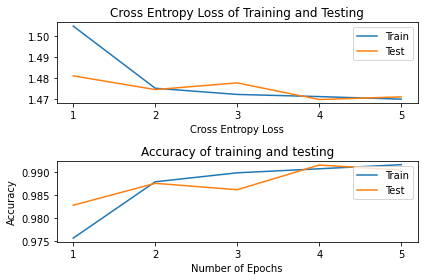

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].plot(np.arange(1, num_epochs + 1), np.array(train_losses))
axs[0].plot(np.arange(1, num_epochs + 1), np.array(test_losses))
axs[0].legend(['Train','Test'], loc='upper right')
axs[0].set_xlabel('Number of Epochs')
axs[0].set_xlabel('Cross Entropy Loss')
axs[0].set_xticks(range(1,num_epochs + 1))
axs[0].set_title('Cross Entropy Loss of Training and Testing')

axs[1].plot(np.arange(1, num_epochs + 1), np.array(train_accuracy))
axs[1].plot(np.arange(1, num_epochs + 1), np.array(test_accuracy))
axs[1].legend(['Train','Test'], loc='upper right')
axs[1].set_xlabel('Number of Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(range(1,num_epochs + 1))
axs[1].set_title('Accuracy of training and testing')

plt.savefig(HOMEWORK_FOLDER+'/pre_nn_training and testing curve.png')
plt.tight_layout()
plt.show()

# **untargeted attack**

true label: tensor([0, 6, 8, 8, 0]) 
predicted label: tensor([0, 6, 8, 8, 0]) 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


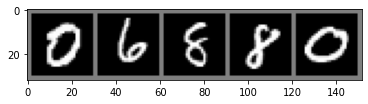


loss: 1.461, current_predict_label: tensor([0, 6, 8, 8, 0])


loss: 1.479, current_predict_label: tensor([0, 6, 8, 8, 0])


loss: 2.004, current_predict_label: tensor([2, 6, 6, 8, 2])


loss: 2.060, current_predict_label: tensor([2, 6, 6, 8, 2])


loss: 2.130, current_predict_label: tensor([2, 6, 6, 8, 2])


loss: 2.279, current_predict_label: tensor([2, 2, 6, 8, 2])

misclassified label: tensor([2, 2, 6, 4, 2]) 


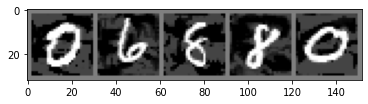

In [152]:
  from torchvision.utils import make_grid
  num_pic = 5
  test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=num_pic, shuffle=True)
  def fgsm_attack(input_image, epsilon, perturbation_grad, perturbation):
    sign_perturbation_grad = torch.sign(perturbation_grad.data)
    perturbation.data += torch.clamp(epsilon * sign_perturbation_grad, min = 0, max = 1)
    perturbed_image = input_image +  perturbation.data
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    perturbation.data = perturbed_image - input_image
    return perturbation

  error = nn.CrossEntropyLoss()
  PATH = HOMEWORK_FOLDER+'/pre-trained model'
  model = HelloWorld().to(device)
  model.load_state_dict(torch.load(PATH))
  model.eval()
  while True:
    test_iterator=iter(test_loader)
    test_images, test_labels=test_iterator.next()
    test_images, test_labels=test_images.to(device), test_labels.to(device)
    output = model(test_images)
    predicted = torch.max(output.data, 1)[1] 
    if torch.equal(test_labels,predicted):
      break
  pre_batch_untarget_original_image = test_images 
  pre_batch_untarget_original_label = test_labels 
  pre_batch_untarget_original_predict = predicted
  print("true label: {} ".format(test_labels.detach().cpu()))
  print("predicted label: {} ".format(predicted.detach().cpu()))
  orig_images=make_grid(test_images.detach(),nrow=num_pic).cpu()
  plt.imshow(orig_images.permute(1,2,0)/2+0.5)
  plt.savefig(HOMEWORK_FOLDER+'/pre_batch_untarget_original_image.png')
  plt.show()
  epsilon = 0.001
  num_training_episode = 1000000
  data = test_images
  target = test_labels

  # Send the data and label to the device
  data, target = data.to(device), target.to(device)
  perturbation = torch.zeros(data.shape).to(device)
  perturbation.requires_grad = True

  for j in range(num_training_episode):
      model.zero_grad()
      output = model(data + perturbation)
      loss = error(output, target)
      loss.backward()
      perturbation_grad = perturbation.grad.data
      # Call FGSM Attack
      perturbation = fgsm_attack(data, epsilon, perturbation_grad, perturbation)
      
      # Re-classify the perturbed image
      output = model(data + perturbation)
      predicted = torch.max(output.data, 1)[1]  # get the index of the max log-probability
                
      # Calculate the loss       
      if j % 100 == 1:
        print('\nloss: {:.3f}, current_predict_label: {}\n'.format(
        loss.detach().cpu(), predicted.detach().cpu()))

      if (predicted-target).byte().all() and torch.max(output.data)>= 0.9:
        print("misclassified label: {} ".format(predicted.detach().cpu()))
        final_perturbed_image = (data + perturbation).detach().cpu()
        pre_batch_untarget_new_image = final_perturbed_image
        # final_perturbed_image = np.squeeze(final_perturbed_image)
        final_perturbed_image=make_grid(final_perturbed_image.detach(),nrow=num_pic).cpu()
        plt.imshow(final_perturbed_image.permute(1,2,0)/2+0.5)
        plt.savefig(HOMEWORK_FOLDER+'/pre_batch_untarget_new_image.png')
        plt.show()
        break


# **target attack**

true label: tensor([0, 6, 8, 8, 0]) 
predicted label: tensor([0, 6, 8, 8, 0]) 


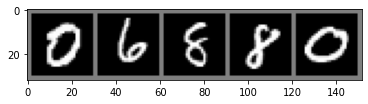


loss: -2.443, current_predict_label: tensor([2, 6, 6, 8, 2])

misclassified label: tensor([2, 4, 6, 4, 4]) 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


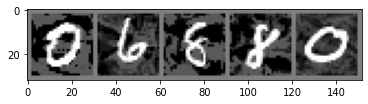

In [153]:
  from torchvision.utils import make_grid
  num_pic = 5
  test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=num_pic, shuffle=True)
  def fgsm_attack(input_image, epsilon, perturbation_grad, perturbation):
    sign_perturbation_grad = torch.sign(perturbation_grad.data)
    perturbation.data += torch.clamp(epsilon * sign_perturbation_grad, min = 0, max = 1)
    perturbed_image = input_image +  perturbation.data
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    perturbation.data = perturbed_image - input_image
    return perturbation

  error = nn.CrossEntropyLoss()
  fig = plt.figure()
  test_images = pre_batch_untarget_original_image 
  test_labels = pre_batch_untarget_original_label 
  predicted = pre_batch_untarget_original_predict
  print("true label: {} ".format(test_labels.detach().cpu()))
  print("predicted label: {} ".format(predicted.detach().cpu()))
  orig_images=make_grid(test_images.detach(),nrow=num_pic).cpu()
  plt.imshow(orig_images.permute(1,2,0)/2+0.5)
  plt.show()
  epsilon = 0.1
  num_training_episode = 1000000
  data = test_images
  true_label = test_labels
  target = torch.tensor([2,4,6,4,4])
  attack_target = target
  error = nn.CrossEntropyLoss()
  PATH = HOMEWORK_FOLDER+'/pre-trained model'
  model = HelloWorld().to(device)
  model.load_state_dict(torch.load(PATH))
  model.eval()

  # Send the data and label to the device
  data, target = data.to(device), target.to(device)
  perturbation = torch.zeros(data.shape).to(device)
  perturbation.requires_grad = True

  for j in range(num_training_episode):
      model.zero_grad()
      output = model(data + perturbation)
      loss = -error(output, target)
      loss.backward()
      perturbation_grad = perturbation.grad.data
      # Call FGSM Attack
      perturbation = fgsm_attack(data, epsilon, perturbation_grad, perturbation)
      
      # Re-classify the perturbed image
      output = model(data + perturbation)
      predicted = torch.max(output.data, 1)[1]  # get the index of the max log-probability
                
      # Calculate the loss       
      if j % 1000 == 1:
        print('\nloss: {:.3f}, current_predict_label: {}\n'.format(
        loss.detach().cpu(), predicted.detach().cpu()))

      if not (predicted-target).byte().any():
        print("misclassified label: {} ".format(predicted.detach().cpu()))
        final_perturbed_image = (data + perturbation).detach().cpu()
        final_perturbed_image=make_grid(final_perturbed_image.detach(),nrow=num_pic).cpu()
        plt.imshow(final_perturbed_image.permute(1,2,0)/2+0.5)
        plt.savefig(HOMEWORK_FOLDER+'/pre_batch_target_new_image.png')
        plt.show()
        break


# 2) Retrain a Convolutional Neural Network# 

In [127]:
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size_test, shuffle=True)
def train(epoch):
    my_first_network.train()
    running_loss = 0
    running_correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = my_first_network(data)
        loss = error(output, target) 
        running_loss += loss.item() * data.size(0)
        loss.backward()
        optimizer.step()
        predicted = torch.max(output.data, 1)[1] 
        running_correct += (predicted == target).sum()
        if batch_idx % display_interval == 0:
          print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(data), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(), float(running_correct*100) / float(batch_size_train*(batch_idx + 1))))
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accu = float(running_correct) / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accu)
    print('\nTrain set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        epoch_loss, running_correct, len(train_loader.dataset),
        100. * running_correct / len(train_loader.dataset)))
    
def test(epoch):
  my_first_network.eval()
  running_loss = 0
  running_correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = my_first_network(data)
      running_loss += error(output, target).item()* data.size(0)
      predicted = torch.max(output.data, 1)[1] 
      running_correct += (predicted == target).sum()
  epoch_loss = running_loss / len(test_loader.dataset)
  epoch_accu = float(running_correct) / len(test_loader.dataset)
  test_losses.append(epoch_loss)
  test_accuracy.append(epoch_accu)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    epoch_loss, running_correct, len(test_loader.dataset),
    100. * running_correct / len(test_loader.dataset)))
  is_new_best(epoch_accu)

def is_new_best(epoch_accu):
  if (epoch_accu > 0.99 and epoch_accu == max(test_accuracy)):
    PATH = HOMEWORK_FOLDER+'/re-trained model'
    torch.save(my_first_network.state_dict(), PATH)

# Instantiate your network here
torch.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
my_first_network = HelloWorld().to(device)
learning_rate = 0.002
optimizer = torch.optim.Adam(my_first_network.parameters(),lr=learning_rate)
error = nn.CrossEntropyLoss()
display_interval = 50
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []
# Train your network here
num_epochs = 5
for epoch in range(num_epochs):
  train(epoch)
  test(epoch)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch : 0 [0/60000 (0%)]	Loss: 2.307219	 Accuracy:7.812%
Epoch : 0 [3200/60000 (5%)]	Loss: 1.557080	 Accuracy:85.999%
Epoch : 0 [6400/60000 (11%)]	Loss: 1.502408	 Accuracy:91.136%
Epoch : 0 [9600/60000 (16%)]	Loss: 1.503256	 Accuracy:93.253%
Epoch : 0 [12800/60000 (21%)]	Loss: 1.468595	 Accuracy:94.302%
Epoch : 0 [16000/60000 (27%)]	Loss: 1.496590	 Accuracy:95.039%
Epoch : 0 [19200/60000 (32%)]	Loss: 1.515093	 Accuracy:95.531%
Epoch : 0 [22400/60000 (37%)]	Loss: 1.493410	 Accuracy:95.887%
Epoch : 0 [25600/60000 (43%)]	Loss: 1.494972	 Accuracy:96.224%
Epoch : 0 [28800/60000 (48%)]	Loss: 1.468560	 Accuracy:96.428%
Epoch : 0 [32000/60000 (53%)]	Loss: 1.480146	 Accuracy:96.607%
Epoch : 0 [35200/60000 (59%)]	Loss: 1.462344	 Accuracy:96.776%
Epoch : 0 [38400/60000 (64%)]	Loss: 1.496361	 Accuracy:96.901%
Epoch : 0 [41600/60000 (69%)]	Loss: 1.490847	 Accuracy:97.017%
Epoch : 0 [44800/60000 (75%)]	Loss: 1.483391	 Accuracy:97.107%
Epoch : 0 [48000/60000 (80%)]	Loss: 1.483684	 Accuracy:97.214%
Ep

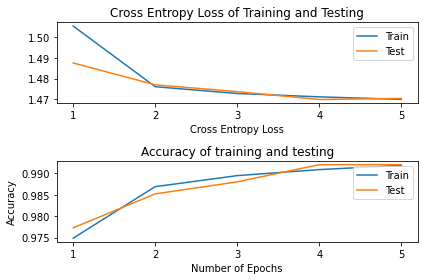

In [134]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].plot(np.arange(1, num_epochs + 1), np.array(train_losses))
axs[0].plot(np.arange(1, num_epochs + 1), np.array(test_losses))
axs[0].legend(['Train','Test'], loc='upper right')
axs[0].set_xlabel('Number of Epochs')
axs[0].set_xlabel('Cross Entropy Loss')
axs[0].set_xticks(range(1,num_epochs + 1))
axs[0].set_title('Cross Entropy Loss of Training and Testing')

axs[1].plot(np.arange(1, num_epochs + 1), np.array(train_accuracy))
axs[1].plot(np.arange(1, num_epochs + 1), np.array(test_accuracy))
axs[1].legend(['Train','Test'], loc='upper right')
axs[1].set_xlabel('Number of Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(range(1,num_epochs + 1))
axs[1].set_title('Accuracy of training and testing')

plt.savefig(HOMEWORK_FOLDER+'/training and testing curve.png')
plt.tight_layout()
plt.show()

# **untargeted attack**

true label: tensor([0, 6, 8, 8, 0]) 
predicted label: tensor([0, 6, 8, 8, 0]) 


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


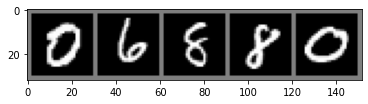


loss: 1.461, current_predict_label: tensor([0, 6, 8, 8, 0])


loss: 1.464, current_predict_label: tensor([0, 6, 8, 8, 0])


loss: 1.819, current_predict_label: tensor([2, 6, 8, 8, 9])


loss: 2.058, current_predict_label: tensor([2, 6, 6, 8, 9])


loss: 2.064, current_predict_label: tensor([2, 6, 6, 8, 9])


loss: 2.142, current_predict_label: tensor([2, 6, 6, 8, 9])


loss: 2.264, current_predict_label: tensor([2, 3, 6, 8, 9])

misclassified label: tensor([2, 3, 6, 6, 9]) 


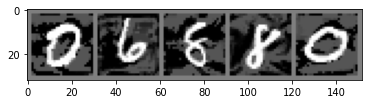

In [154]:
  from torchvision.utils import make_grid
  num_pic = 5
  test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=num_pic, shuffle=True)
  def fgsm_attack(input_image, epsilon, perturbation_grad, perturbation):
    sign_perturbation_grad = torch.sign(perturbation_grad.data)
    perturbation.data += torch.clamp(epsilon * sign_perturbation_grad, min = 0, max = 1)
    perturbed_image = input_image +  perturbation.data
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    perturbation.data = perturbed_image - input_image
    return perturbation

  error = nn.CrossEntropyLoss()
  PATH = HOMEWORK_FOLDER+'/re-trained model'
  model = HelloWorld().to(device)
  model.load_state_dict(torch.load(PATH))
  model.eval()

  re_batch_untarget_original_image = pre_batch_untarget_original_image
  re_batch_untarget_original_label = pre_batch_untarget_original_label

  test_labels = re_batch_untarget_original_label
  test_images = re_batch_untarget_original_image
  output = model(test_images)
  predicted = torch.max(output.data, 1)[1] 
  re_batch_untarget_original_predict = predicted

  print("true label: {} ".format(test_labels.detach().cpu()))
  print("predicted label: {} ".format(predicted.detach().cpu()))
  orig_images=make_grid(test_images.detach(),nrow=num_pic).cpu()
  plt.imshow(orig_images.permute(1,2,0)/2+0.5)
  plt.savefig(HOMEWORK_FOLDER+'/re_batch_untarget_original_image.png')
  plt.show()
  epsilon = 0.001
  num_training_episode = 1000000
  data = test_images
  target = test_labels

  # Send the data and label to the device
  data, target = data.to(device), target.to(device)
  perturbation = torch.zeros(data.shape).to(device)
  perturbation.requires_grad = True

  for j in range(num_training_episode):
      model.zero_grad()
      output = model(data + perturbation)
      loss = error(output, target)
      loss.backward()
      perturbation_grad = perturbation.grad.data
      # Call FGSM Attack
      perturbation = fgsm_attack(data, epsilon, perturbation_grad, perturbation)
      
      # Re-classify the perturbed image
      output = model(data + perturbation)
      predicted = torch.max(output.data, 1)[1]  # get the index of the max log-probability
                
      # Calculate the loss       
      if j % 100 == 1:
        print('\nloss: {:.3f}, current_predict_label: {}\n'.format(
        loss.detach().cpu(), predicted.detach().cpu()))

      if (predicted-target).byte().all() and torch.max(output.data)>= 0.9:
        print("misclassified label: {} ".format(predicted.detach().cpu()))
        final_perturbed_image = (data + perturbation).detach().cpu()
        pre_batch_untarget_new_image = final_perturbed_image
        # final_perturbed_image = np.squeeze(final_perturbed_image)
        final_perturbed_image=make_grid(final_perturbed_image.detach(),nrow=num_pic).cpu()
        plt.imshow(final_perturbed_image.permute(1,2,0)/2+0.5)
        plt.savefig(HOMEWORK_FOLDER+'/re_batch_untarget_new_image.png')
        plt.show()
        break


# **target attack**

true label: tensor([0, 6, 8, 8, 0]) 
predicted label: tensor([0, 6, 8, 8, 0]) 


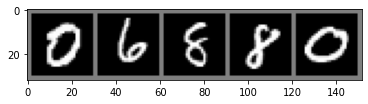


loss: -2.458, current_predict_label: tensor([2, 6, 8, 8, 9])



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


misclassified label: tensor([2, 4, 6, 4, 4]) 


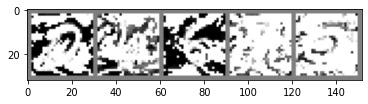

In [155]:
  from torchvision.utils import make_grid
  num_pic = 5
  test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=num_pic, shuffle=True)
  def fgsm_attack(input_image, epsilon, perturbation_grad, perturbation):
    sign_perturbation_grad = torch.sign(perturbation_grad.data)
    perturbation.data += torch.clamp(epsilon * sign_perturbation_grad, min = 0, max = 1)
    perturbed_image = input_image +  perturbation.data
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    perturbation.data = perturbed_image - input_image
    return perturbation

  error = nn.CrossEntropyLoss()
  fig = plt.figure()
  test_images = re_batch_untarget_original_image 
  test_labels = re_batch_untarget_original_label 
  predicted = re_batch_untarget_original_predict
  print("true label: {} ".format(test_labels.detach().cpu()))
  print("predicted label: {} ".format(predicted.detach().cpu()))
  orig_images=make_grid(test_images.detach(),nrow=num_pic).cpu()
  plt.imshow(orig_images.permute(1,2,0)/2+0.5)
  plt.show()
  epsilon = 0.1
  num_training_episode = 1000000
  data = test_images
  true_label = test_labels
  target = attack_target
  error = nn.CrossEntropyLoss()
  PATH = HOMEWORK_FOLDER+'/re-trained model'
  model = HelloWorld().to(device)
  model.load_state_dict(torch.load(PATH))
  model.eval()

  # Send the data and label to the device
  data, target = data.to(device), target.to(device)
  perturbation = torch.zeros(data.shape).to(device)
  perturbation.requires_grad = True

  for j in range(num_training_episode):
      model.zero_grad()
      output = model(data + perturbation)
      loss = -error(output, target)
      loss.backward()
      perturbation_grad = perturbation.grad.data
      # Call FGSM Attack
      perturbation = fgsm_attack(data, epsilon, perturbation_grad, perturbation)
      
      # Re-classify the perturbed image
      output = model(data + perturbation)
      predicted = torch.max(output.data, 1)[1]  # get the index of the max log-probability
                
      # Calculate the loss       
      if j % 1000 == 1:
        print('\nloss: {:.3f}, current_predict_label: {}\n'.format(
        loss.detach().cpu(), predicted.detach().cpu()))

      if not (predicted-target).byte().any():
        print("misclassified label: {} ".format(predicted.detach().cpu()))
        final_perturbed_image = (data + perturbation).detach().cpu()
        final_perturbed_image=make_grid(final_perturbed_image.detach(),nrow=num_pic).cpu()
        plt.imshow(final_perturbed_image.permute(1,2,0)/2+0.5)
        plt.savefig(HOMEWORK_FOLDER+'/re_batch_target_new_image.png')
        plt.show()
        break
